# Boston Airbnb Listings

## Section 1: Business Understanding

In this notebook, I will be analyzing Airbnb listings from the Boston area. This information was downloaded from a Boston dataset on https://www.kaggle.com/airbnb/boston?select=listings.csv. The listings were all taken from 2008-2016. Using this information, we intend to answer the following questions:

1. How do discrete features such as bathroom count affect the total price of an Airbnb listing?
2. Which amenities affect the listing price the most?
3. Which neighbourhood would have the least/most expensive listings?
4. What features adversely predict the price of an Airbnb listing the most?

## Section 2: Data Understanding
### Access and Explore

In [1]:
# Import necessary libraries for the project

import pandas as pd
import numpy as np

#Visualization libraries

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

!pip install folium
import folium

# Debugging Library
import pdb

# Display all rows and columns of the dataframe

#pd.pandas.set_option('display.max_rows', None)
pd.pandas.set_option('display.max_columns', None)

### Data Exploration

In [2]:
listings = pd.read_csv('boston_listings.csv')
print("This dataset has {} rows and {} columns".format(listings.shape[0],listings.shape[1]),end="\n")

This dataset has 3585 rows and 95 columns


In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

### Map of Boston

I wanted to create a map to show the variation of price by zipcode. Below I create a zipcode dataframe and use the Folium library to visualize it. Before, I needed to make modifications to the values to ensure that the zipcodes are string objects and the price values are floats. 

In [4]:
# I calcuated the mean of the latitude and longitude to find a central location of Boston to visualize
lat = listings['latitude'].mean()
long = listings['longitude'].mean()

# Creating a dataframe with zipcode and price columns
zipcode_df = listings.loc[:,['zipcode','price']]

zipcode_df['price'] = zipcode_df['price'].str.replace('$','')
zipcode_df['price'] = zipcode_df['price'].str.replace(',','')

# Converting price to a float
zipcode_df['price'] = zipcode_df['price'].astype(float)

In [5]:
# Percentage of NULL values
round(zipcode_df.isna().sum()/zipcode_df.shape[0]*100,2)

zipcode    1.06
price      0.00
dtype: float64

There are 1.06% NULL values in the zipcode column. Since the zipcode column has nearly 99% values, we will simply drop the NULL values.

In [6]:
zipcode_df = zipcode_df.dropna()

In [7]:
# Analyzing the zipcode values to determine if modifications are needed
pd.pandas.set_option('display.max_rows', None)
zipcode_df['zipcode'].unique()

array(['02131', '02130', '02119', '02120', '02115', '02215', '02116',
       '02111', '02109', '02113', '02110', '02114', '02108', '02121',
       '02118', '02125', '02124', '02210', '02218', '02142', '02128',
       '02129', '02145', '02126', '02108 02111', '02472', '02122',
       '02446', '02135', '02134', '02445', '02132', '02467', '02136',
       '02186', '02169', '02127', '02134-1704', '02163', '02138', '02139',
       '02141', '02143'], dtype=object)

We notice that the majority of zipcodes are simply 5-digit zipcodes; however, there is 1 zipcode with the final 4 digits shown, and another with 2 separate zipcodes shown as one zipcode

In [8]:
# Dropping the final 4 digits of the zipcode to match the format of the other zipcodes
zipcode_df['zipcode'] = zipcode_df['zipcode'].str.replace('02134-1704','02134')

# 2 nearby zipcodes were provided. Since the locations are close, I chose to only keep 1 zipcode
zipcode_df['zipcode'] = zipcode_df['zipcode'].str.replace('02108 02111','02108')

In [9]:
#  Creating a map with the Boston latitude and longitude values
map = folium.Map(location=[lat,long],default_zoom_start=15)

# Creating a choropleth of prices by zipcode in the Boston area
folium.Choropleth(geo_data='/Users/Brandon/Desktop/Udacity/ZIP_Codes.geojson',
              data = zipcode_df, 
              columns = ['zipcode','price'],
              key_on = 'feature.properties.ZIP5',
              fill_color='YlOrRd',
              fill_opacity=0.7,
              line_opacity=0.2,
              legend_name='Listing Price',
              highlight = True
              ).add_to(map)

map

The prices are most expensive near central Boston area. As we get further away from the city, the price goes down, except for one area in the south-west region

## Section 3: Prepare Data
### Categorical Features

In order to answer some of the business questions, it is necessary to properly clean the dataset. Below we will evaluate to make sure that all columns have the correct data type. Without the correct data types, some visualizations would not be possible.

In [10]:
# Creating a dataframe only containing object data types
obj_cols = listings.select_dtypes(include='object')

print("This dataset contains only object data types, has {} rows and {} columns".format(obj_cols.shape[0],obj_cols.shape[1]),end="\n")

obj_cols.head()

This dataset contains only object data types, has 3585 rows and 62 columns


,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/12147973,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Entire home/apt,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,NaN,NaN,NaN,$35.00,$0.00,2 weeks ago,2016-09-06,NaN,NaN,f,f,moderate,f,f
1,https://www.airbnb.com/rooms/3075044,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,Apartment,Private room,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,$400.00,NaN,$95.00,$10.00,$0.00,a week ago,2016-09-06,2014-06-01,2016-08-13,f,t,moderate,f,f
2,https://www.airbnb.com/rooms/6976,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","ABOUT ME: I'm 

<b>The following columns are percentages:</b>
1. host_response_rate
2. host_acceptance_rate 


Since these can be represented as continuous values, we will convert them into decimal form (float data type)

<b>These following columns are prices (in dollars):</b>
3. price
4. weekly_price
5. monthly_price
6. security_deposit
7. cleaning_fee
8. extra_people 

Since there are dollar signs, we will need to remove them and convert these to floats. To avoid confusion over the currency type, we will include the dollar sign in the header.

<b>The following columns are date columns:</b>
9. last_scraped
10. host_since
11. calendar_last_scraped
12. first_review
13. last_review 

We will drop these as we have no intentions of analyzing price in relation to time

In [11]:
# Creating the necessary lists
percent_cols = ['host_response_rate','host_acceptance_rate']
currency_cols = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']
date_cols = ['last_scraped','host_since','calendar_last_scraped','first_review','last_review']


# Converting currency features to numerical data types
for feature in currency_cols:
    
    listings[feature] = listings[feature].str.replace('$','')
    listings[feature] = listings[feature].str.replace(',','')
    
    # Converting from an object datatype to a float
    listings[feature] = listings[feature].astype(float)
    
     
# Converting percentage features to floats
for feature in percent_cols:
    
    listings[feature] = listings[feature].str.replace('%','')
    
    # Converting from an object datatype to a float
    listings[feature] = listings[feature].astype(float)
    
    # Converting to decimal form
    listings[feature] = listings[feature].map(lambda x: x/100)


# Dropping the date type columns

listings.drop(date_cols, axis=1, inplace=True)

In [12]:
# Renaming columns to show the values are in dollar amounts

for label in currency_cols:
    listings.rename({label:label+"($)"},axis=1, inplace=True)
    
#Renaming columns to show the values are percentages

for label in percent_cols:
    listings.rename({label:label+"(%)"}, axis=1, inplace=True)

In [13]:
obj_cols2 = listings.select_dtypes(include='object')

# Checking the new object type column count

print("This dataset has {} rows and {} columns".format(obj_cols2.shape[0],obj_cols2.shape[1]),end="\n")

obj_cols2.head(1)

This dataset has 3585 rows and 49 columns


,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,calendar_updated,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://www.airbnb.com/users/show/31303940,Virginia,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,MA,02131,Boston,"Boston, MA",US,United States,t,House,Entire home/apt,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",2 weeks ago,f,f,moderate,f,f


Now we will check to see if there are categorical columns with no variation. If they have no variation, then they will have no predictive power. We will also print out the number of unique values per feature.

In [14]:
no_var = []

for feature in list(obj_cols2.columns):
    
    # calculates the number of unique values in a feature. If only 1, there is no variation and we add to no_var list
    if len(list(obj_cols2[feature].unique())) == 1:
        no_var.append(feature)
        continue
        
    #Features with variation will be printed below with the number of unique values
    print([feature],"has {} unique values".format(len(list(obj_cols2[feature].unique())),end="\n"))

['listing_url'] has 3585 unique values
['name'] has 3504 unique values
['summary'] has 3114 unique values
['space'] has 2269 unique values
['description'] has 3423 unique values
['neighborhood_overview'] has 1729 unique values
['notes'] has 1270 unique values
['transit'] has 1860 unique values
['access'] has 1763 unique values
['interaction'] has 1618 unique values
['house_rules'] has 1929 unique values
['thumbnail_url'] has 2987 unique values
['medium_url'] has 2987 unique values
['picture_url'] has 3585 unique values
['xl_picture_url'] has 2987 unique values
['host_url'] has 2181 unique values
['host_name'] has 1334 unique values
['host_location'] has 177 unique values
['host_about'] has 1241 unique values
['host_response_time'] has 5 unique values
['host_is_superhost'] has 2 unique values
['host_thumbnail_url'] has 2174 unique values
['host_picture_url'] has 2174 unique values
['host_neighbourhood'] has 54 unique values
['host_verifications'] has 83 unique values
['host_has_profile_

In [15]:
no_var

['experiences_offered', 'state', 'country_code', 'country', 'requires_license']

The columns above have no variation and therefore can be dropped

In [16]:
# Dropping the 5 columns from the dataset
listings.drop(no_var, axis=1, inplace=True)

listings.shape

(3585, 85)

Other columns can be dropped as well. These are columns with distinct urls for every record, columns that are fully text filled, and other discrete type columns with so much variation it would be impossible to use them to predict prices. Note: For a later study, natural language processing could be used, but it is out of the scope of this assignment.

In [17]:
cols_high_var = []

for feature in list(listings.select_dtypes(include='object').columns):
    
    # Considering these are categorical features, we will drop columns with more than 50 distinct values.
    
    if len(listings[feature].unique()) >= 50:
        cols_high_var.append(feature)

In [18]:
listings[cols_high_var].head(3)

,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_location,host_about,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,street,amenities
0,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://www.airbnb.com/users/show/31303940,Virginia,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,"['email', 'phone', 'facebook', 'reviews']","Birch Street, Boston, MA 02131, United States","{TV,""Wireless Internet"",Kitchen,""Free Parking ..."
1,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://www.airbnb.com/users/show/2572247,Andrea,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,"['email', 'phone', 'facebook', 'linkedin', 'am...","Pinehurst Street, Boston, MA 02131, United States","{TV,Internet,""Wireless Internet"",""Air Conditio..."
2,https://www.airbnb.com/rooms/6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://www.airbnb.com/users/show/16701,Phil,"Boston, Massachusetts, United States","I am a middle-aged, single male with a wide ra...",https://a2.muscache.com/im/users/16701/profile...,https://a2.muscache.com/im/users/16701/profile...,Roslindale,"['email', 'phone', 'reviews', 'jumio']","Ardale St., Boston, MA 02131, United States","{TV,""Cable TV"",""Wireless Internet"",""Air Condit..."


The majority of the above features are text-filled. I would like to keep the amenities though in order to determine which features affect the price the most; therefore, I will remove amenities from the cols_high_var list 

In [19]:
cols_high_var.pop(-1) # we want to keep amenities for further analysis

'amenities'

The other columns in the list will be dropped from the listings dataset

In [20]:
listings.drop(cols_high_var, axis=1,inplace=True)

listings.shape

(3585, 61)

### Numerical Features

We will now analyze the numerical features.

In [21]:
numerical_features = [feature for feature in listings.columns if listings[feature].dtypes != 'O']

print('Number of numerical variables: ',len(numerical_features))

listings[numerical_features].head()

Number of numerical variables:  41


,id,scrape_id,host_id,host_response_rate(%),host_acceptance_rate(%),host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price($),weekly_price($),monthly_price($),security_deposit($),cleaning_fee($),guests_included,extra_people($),minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
0,12147973,20160906204935,31303940,NaN,NaN,1,1,NaN,42.282619,-71.133068,4,1.5,2.0,3.0,NaN,250.0,NaN,NaN,NaN,35.0,1,0.0,2,1125,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,3075044,20160906204935,2572247,1.0,1.00,1,1,NaN,42.286241,-71.134374,2,1.0,1.0,1.0,NaN,65.0,400.0,NaN,95.0,10.0,0,0.0,2,15,NaN,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,NaN,NaN,1,1.30
2,6976,20160906204935,16701,1.0,0.88,1,1,NaN,42.292438,-71.135765,2,1.0,1.0,1.0,NaN,65.0,395.0,1350.0,NaN,NaN,1,20.0,3,45,NaN,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,NaN,NaN,1,0.47
3,1436513,20160906204935,6031442,1.0,0.50,1,1,NaN,42.281106,-71.121021,4,1.0,1.0,2.0,NaN,75.0,NaN,NaN,100.0,50.0,2,25.0,1,1125,NaN,6,16,26,98,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,1,1.00
4,7651065,20160906204935,15396970,1.0,1.00,1,1,NaN,42.284512,-71.136258,2,1.5,1.0,2.0,NaN,79.0,NaN,NaN,NaN,15.0,1,0.0,2,31,NaN,13,34,59,334,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,NaN,1,2.25


In [22]:
len(listings.id.unique())

3585

'id' is a unique identifier and cannot be used for prediction. We will delete this feature.

In [23]:
len(listings.scrape_id.unique())

1

'scrape_id' only has 1 distinct value so it will have no predictive power. We will delete this feature.

In [24]:
listings.host_id.value_counts()

30283594    136
25188        79
9419684      61
12243051     58
22348222     50
4962900      25
21184200     24
1444340      24
26956083     24
32532791     20
16186589     20
814298       19
18202088     17
16442921     15
9410008      15
51673899     14
22541573     13
508268       12
28820575     11
48494513     11
5618949      11
5578043      10
26988        10
8139434      10
20857768     10
71783        10
30489899      9
119019        9
3594203       8
19246369      8
19548932      8
4195134       7
3137257       7
2356643       7
14785487      7
26704689      7
10478250      7
6608084       7
47283683      7
25938928      7
324630        7
16052189      6
71393113      6
18517776      6
3637081       6
9653086       6
8229          6
1651480       6
9663343       6
18479599      6
54099497      6
11228809      6
9189449       6
47664830      6
6331373       6
3011415       5
6103425       5
50646598      5
32304279      5
255183        5
3875741       5
31340713      5
43217109

'host_id' will later be converted using dummy variables. There is a possibility that some hosts consistently charge different prices than others.

Features with over 50% NULL values will be deleted from the dataset. 

In [25]:
over50_nulls = []

for feature in numerical_features:
    if listings[feature].isna().sum()/listings.shape[0] > .50:
        over50_nulls.append(feature)

In [26]:
over50_nulls

['neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price($)',
 'monthly_price($)',
 'security_deposit($)',
 'has_availability',
 'license',
 'jurisdiction_names']

The above 8 columns will all be deleted because they have over 50% NULL values

In [27]:
# Removing square_feet, weekly_price, monthly_price, and security_deposit because they have over 50% NULL values
# id and scrape_id have no predictive power
# Other columns are dropped due to low or no variation

numerical_drops = ['square_feet','weekly_price($)','security_deposit($)','monthly_price($)','id','scrape_id','host_total_listings_count', 'neighbourhood_group_cleansed','has_availability','license','jurisdiction_names']

listings.drop(numerical_drops, axis=1, inplace=True)

# Removing elements from the list in case we re-use later

for element in numerical_drops:
    numerical_features.remove(element)

In [28]:
listings.head(3)

,host_id,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price($),cleaning_fee($),guests_included,extra_people($),minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,31303940,NaN,NaN,NaN,f,1,t,f,Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,35.0,1,0.0,2,1125,2 weeks ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN
1,2572247,within an hour,1.0,1.00,f,1,t,t,Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",65.0,10.0,0,0.0,2,15,a week ago,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,moderate,f,f,1,1.30
2,16701,within a few hours,1.0,0.88,t,1,t,t,Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",65.0,NaN,1,20.0,3,45,5 days ago,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,moderate,t,f,1,0.47


In [29]:
listings.market.value_counts()

Boston                   3568
Other (Domestic)            1
Other (International)       1
San Francisco               1
Name: market, dtype: int64

'market' will be dropped because lack of variation

In [30]:
listings.drop('market',axis=1,inplace=True)

The dataset is now ready for analysis

# Section 4: Evaluation

## Question 1: How do the discrete features affect the price?

In [31]:
# Creating a list of discrete features
discrete_features = [feature for feature in numerical_features if len(listings[feature].unique()) < 25  ]
print("Total discrete features: {}".format(len(discrete_features)))

Total discrete features: 11


In [32]:
listings[discrete_features].head()

,accommodates,bathrooms,bedrooms,beds,guests_included,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4,1.5,2.0,3.0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,1.0,1.0,0,10.0,9.0,10.0,10.0,9.0,9.0
2,2,1.0,1.0,1.0,1,10.0,9.0,10.0,10.0,9.0,10.0
3,4,1.0,1.0,2.0,2,10.0,10.0,10.0,10.0,10.0,10.0
4,2,1.5,1.0,2.0,1,10.0,10.0,10.0,10.0,9.0,10.0


In [33]:
# for feature in discrete_features:
#     print( feature+ " has {} percent NULL values".format(listings[feature].isna().sum()/len(listings[feature])*100))

### Data Modeling

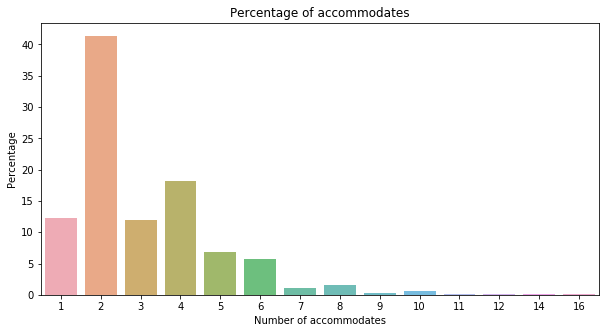

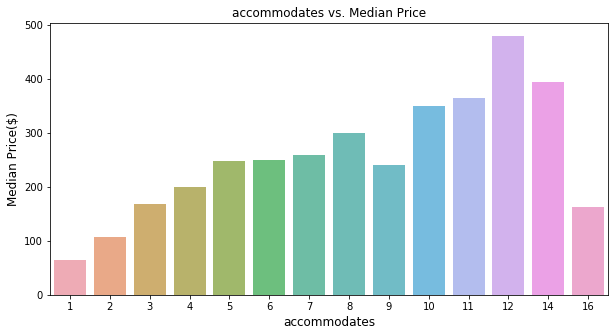

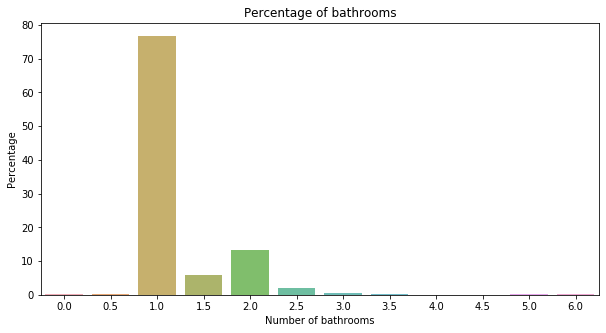

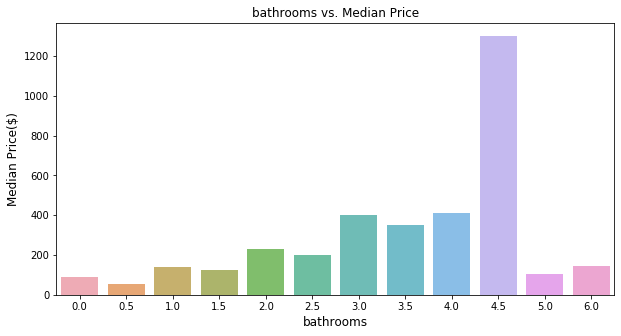

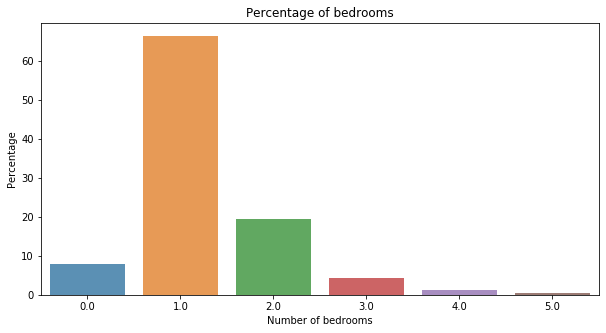

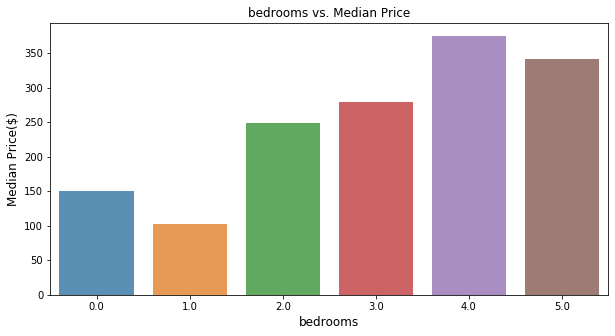

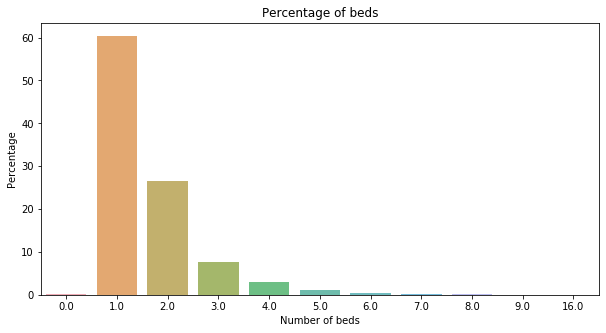

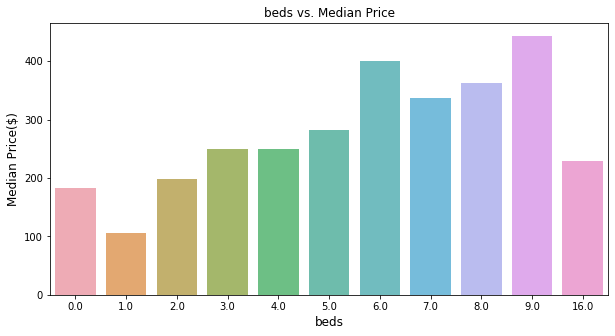

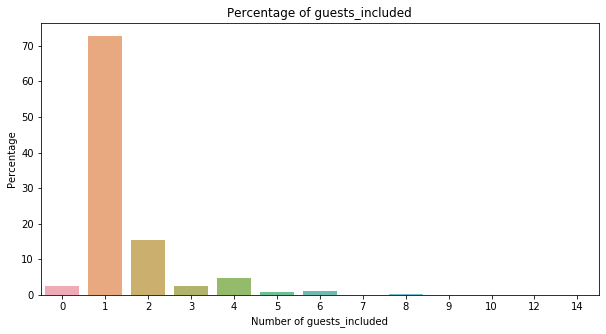

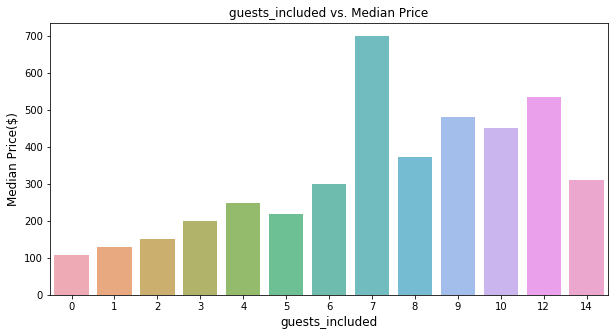

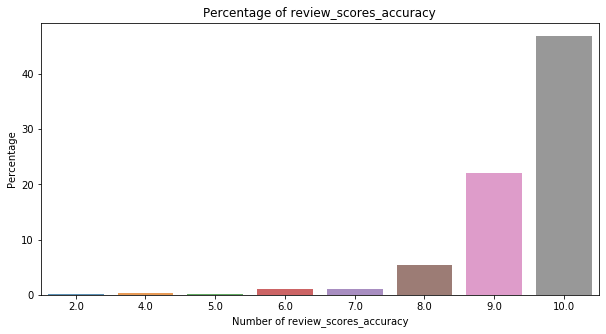

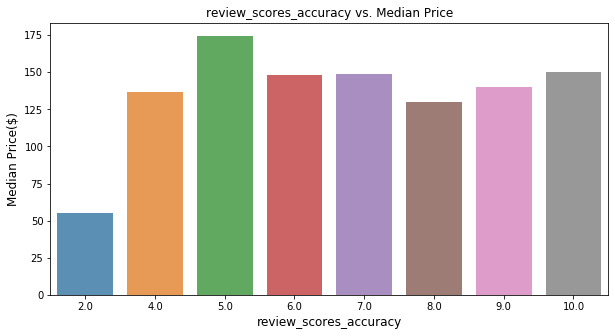

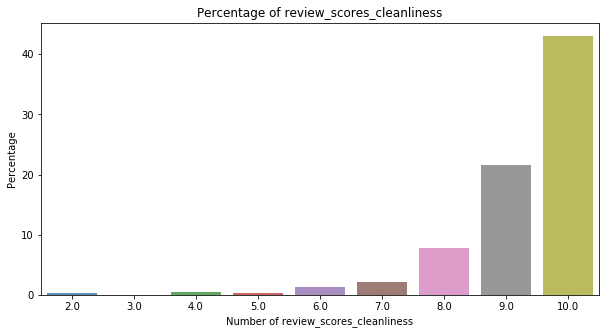

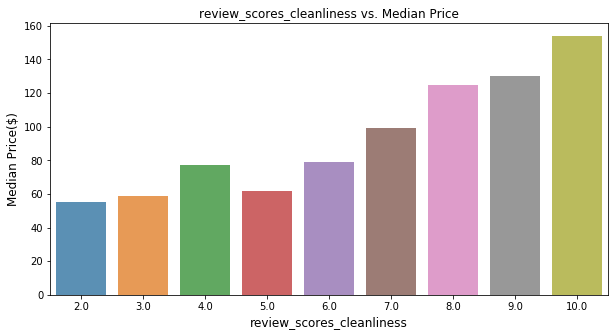

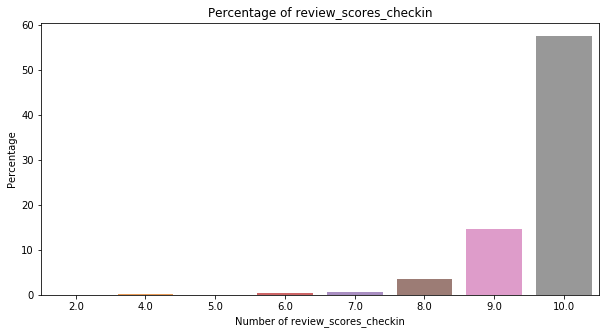

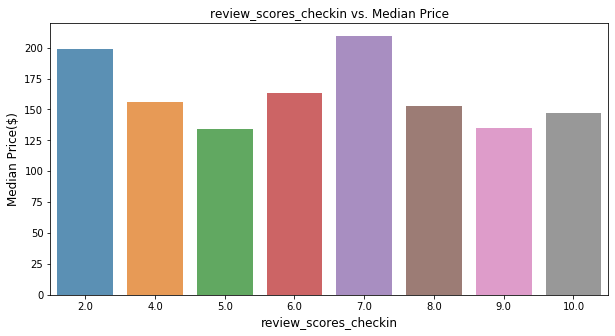

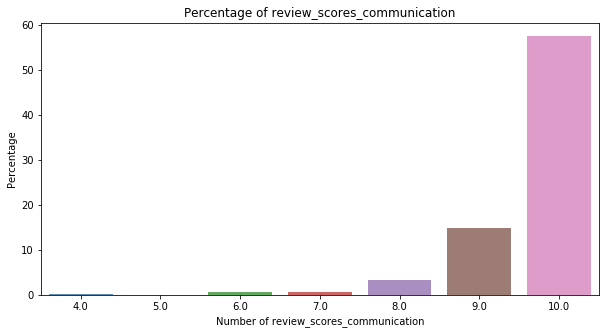

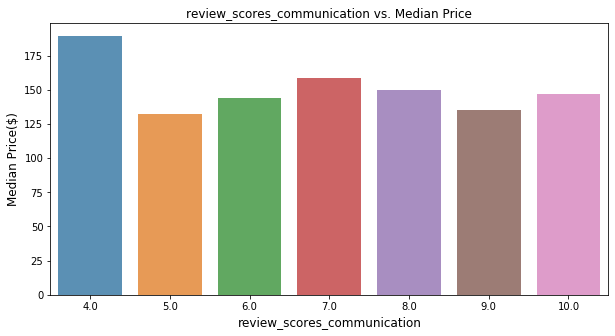

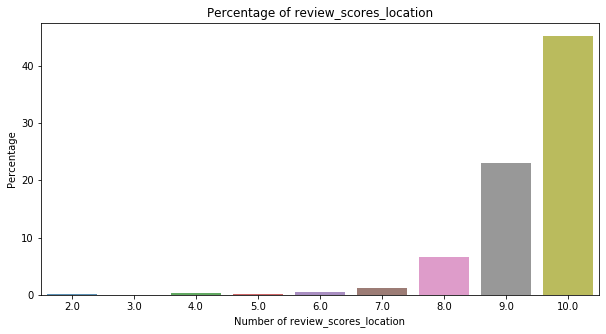

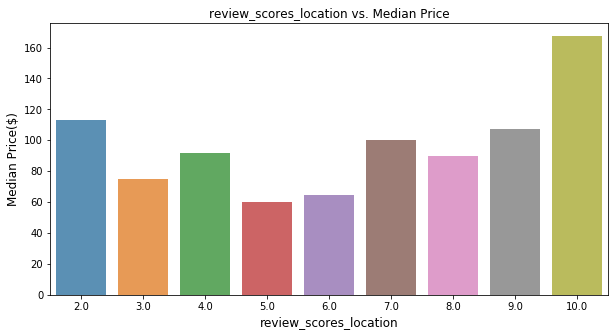

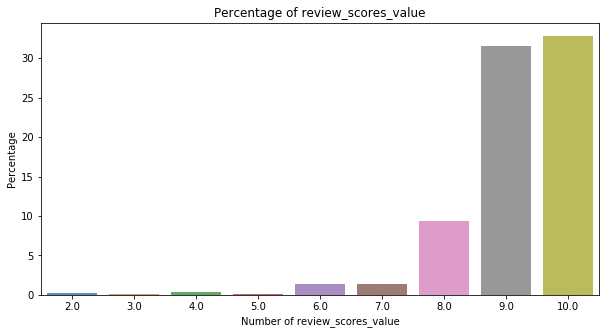

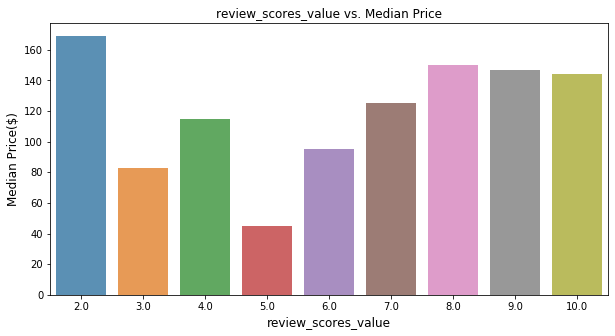

In [34]:
for feature in discrete_features:
    listings_copy = listings.copy()
    
    feature_count = listings_copy[feature].value_counts()
    feature_perc = feature_count/listings_copy.shape[0]*100
    
    feature_median = listings_copy.groupby(feature)['price($)'].median()
    
    plt.figure(figsize=(10,5))
    sns.barplot(feature_perc.index, feature_perc.values,alpha=0.8)
    plt.title("Percentage of "+feature)
    plt.xlabel("Number of "+feature)
    plt.ylabel("Percentage")
    plt.show()
    
    plt.figure(figsize=(10,5))
    sns.barplot(feature_median.index, feature_median.values, alpha=0.8)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Median Price($)',fontsize=12)
    plt.title(feature + " vs. Median Price")
    plt.show()

### Summary

<b>accommodates:</b> The number of people accomodated is mostly positively correlated with the median price. We can also see that most listings (aprox. 47%) accommodate 2 people. 

<b>bathrooms:</b> The number of bathrooms is positively correlated with the median price of a listing. Strangely, price decreases with an additional half-bathroom. There was 1 listing of 4.5 bathrooms that looks like it may have been an outlier.

<b>bedrooms:</b> A listing with 0 bedrooms costs more than a listing with 1 bedroom. A 1 bedroom is far cheaper than the rest of the listings at approx. $100 a night. A 4-bedroom listing is more expensive than a 5-bedroom listing. Otherwise, the number of bedrooms is positively correlated with the median price of a listing. 

<b>beds:</b> The number of beds looks to be positively correlated with the median price of a listing. The majority of the listings have 0-6 beds(nearly 60 percent are 1-bedroom listings). Strangely, a 0-bed listing costs more than a 1-bed listing.

<b>guests_included:</b> The number of guests_included is positively correlated with the median price of a listing. There is a spike and a dip in the data at 7-guests_included and 14-guests_included. However, these make up approximately 0 percent of the data and are likely outliers. 

<b>review_scores_accuracy:</b> The majority of clients rated the listings from 8 - 10. There is positive correlation with price in those ratings. Otherwise, there is not much correlation.

<b>review_scores_cleanliness:</b> the review_score_cleanliness is positively correlated with the median price of a listing

<b>review_scores_checkin:</b> there is not much correaltion between review_scores_checkin and the median price of a listing

<b>review_scores_communication:</b> there is not much correlation between review_scores_communication and the median price of a listing

<b>review_scores_location:</b> the majority of the ratings are between 8 and 10. Locations with a 10 rating had the highest median price.

<b>review_scores_value:</b> Values under 6 were not recorded at high enough frequency to have high confidence in the results. For ratings 6 and above , the median price peaks at ratings of 8. Ratings of 9 and 10 had slightly lower median prices than ratings of 8.

## Question 2: What amenity increases the listing price the most?

In [35]:
# Analyzing the listings.amenities series
listings.amenities.head()

0    {TV,"Wireless Internet",Kitchen,"Free Parking ...
1    {TV,Internet,"Wireless Internet","Air Conditio...
2    {TV,"Cable TV","Wireless Internet","Air Condit...
3    {TV,Internet,"Wireless Internet","Air Conditio...
4    {Internet,"Wireless Internet","Air Conditionin...
Name: amenities, dtype: object

In [36]:
#We will eliminate the '{','}', and '"' characters so that we can later separate the amenities
listings['amenities'] = listings['amenities'].str.replace('{','')
listings['amenities'] = listings['amenities'].str.replace('}','')
listings['amenities'] = listings['amenities'].str.replace('"','')
listings.amenities.head()

0    TV,Wireless Internet,Kitchen,Free Parking on P...
1    TV,Internet,Wireless Internet,Air Conditioning...
2    TV,Cable TV,Wireless Internet,Air Conditioning...
3    TV,Internet,Wireless Internet,Air Conditioning...
4    Internet,Wireless Internet,Air Conditioning,Ki...
Name: amenities, dtype: object

In [37]:
# We will split the amenities using the ',' as the delimiter
uniq_groups = set(x for feature in listings['amenities'].str.split(',') for x in feature)

for feature in uniq_groups:
    listings[feature] = listings['amenities'].map(lambda x: len([i for i in x.split(',')if i == feature]))

In [38]:
listings.head(3)

,host_id,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price($),cleaning_fee($),guests_included,extra_people($),minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Smoking Allowed,,Wireless Internet,Laptop Friendly Workspace,Essentials,Carbon Monoxide Detector,Wheelchair Accessible,translation missing: en.hosting_amenity_49,Indoor Fireplace,TV,Fire Extinguisher,Free Parking on Premises,24-Hour Check-in,Hot Tub,Pool,Paid Parking Off Premises,Washer / Dryer,Air Conditioning,Washer,Hair Dryer,Suitable for Events,Shampoo,Pets Allowed,Other pet(s),Elevator in Building,Breakfast,Family/Kid Friendly,Doorman,Internet,Dog(s),Cable TV,Safety Card,Gym,Kitchen,Dryer,First Aid Kit,Heating,translation missing: en.hosting_amenity_50,Pets live on this property,Iron,Free Parking on Street,Hangers,Buzzer/Wireless Intercom,Lock on Bedroom Door,Cat(s),Smoke Detector
0,31303940,NaN,NaN,NaN,f,1,t,f,Roslindale,Roslindale,Boston,02131,"Boston, MA",42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"TV,Wireless Internet,Kitchen,Free Parking on P...",250.0,35.0,1,0.0,2,1125,2 weeks ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1
1,2572247,within an hour,1.0,1.00,f,1,t,t,Roslindale,Roslindale,Boston,02131,"Boston, MA",42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air Conditioning...",65.0,10.0,0,0.0,2,15,a week ago,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,moderate,f,f,1,1.30,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1
2,16701,within a few hours,1.0,0.88,t,1,t,t,Roslindale,Roslindale,Boston,02131,"Boston, MA",42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wireless Internet,Air Conditioning...",65.0,NaN,1,20.0,3,45,5 days ago,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,moderate,t,f,1,0.47,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0,0,0,0,1,0,1


In [39]:
# Dropping the amenities feature as it is now redundant, as well as features missing translations
drops = ['amenities','','translation missing: en.hosting_amenity_49','translation missing: en.hosting_amenity_50']
listings.drop(drops, axis=1,inplace=True)

listings.head(3)

,host_id,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price($),cleaning_fee($),guests_included,extra_people($),minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Smoking Allowed,Wireless Internet,Laptop Friendly Workspace,Essentials,Carbon Monoxide Detector,Wheelchair Accessible,Indoor Fireplace,TV,Fire Extinguisher,Free Parking on Premises,24-Hour Check-in,Hot Tub,Pool,Paid Parking Off Premises,Washer / Dryer,Air Conditioning,Washer,Hair Dryer,Suitable for Events,Shampoo,Pets Allowed,Other pet(s),Elevator in Building,Breakfast,Family/Kid Friendly,Doorman,Internet,Dog(s),Cable TV,Safety Card,Gym,Kitchen,Dryer,First Aid Kit,Heating,Pets live on this property,Iron,Free Parking on Street,Hangers,Buzzer/Wireless Intercom,Lock on Bedroom Door,Cat(s),Smoke Detector
0,31303940,NaN,NaN,NaN,f,1,t,f,Roslindale,Roslindale,Boston,02131,"Boston, MA",42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,250.0,35.0,1,0.0,2,1125,2 weeks ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1
1,2572247,within an hour,1.0,1.00,f,1,t,t,Roslindale,Roslindale,Boston,02131,"Boston, MA",42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,10.0,0,0.0,2,15,a week ago,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,moderate,f,f,1,1.30,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,0,1,1,1,0,1,0,1,0,1
2,16701,within a few hours,1.0,0.88,t,1,t,t,Roslindale,Roslindale,Boston,02131,"Boston, MA",42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,65.0,NaN,1,20.0,3,45,5 days ago,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,moderate,t,f,1,0.47,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,1


In [40]:
listings.shape

(3585, 91)

In [41]:
# Creating the Amenities DataFrame
amns_df = listings.iloc[:,-43:]

# Adding price to the Amenities DataFrame
amns_df['price($)'] = listings['price($)']
amns_df.head()

,Smoking Allowed,Wireless Internet,Laptop Friendly Workspace,Essentials,Carbon Monoxide Detector,Wheelchair Accessible,Indoor Fireplace,TV,Fire Extinguisher,Free Parking on Premises,24-Hour Check-in,Hot Tub,Pool,Paid Parking Off Premises,Washer / Dryer,Air Conditioning,Washer,Hair Dryer,Suitable for Events,Shampoo,Pets Allowed,Other pet(s),Elevator in Building,Breakfast,Family/Kid Friendly,Doorman,Internet,Dog(s),Cable TV,Safety Card,Gym,Kitchen,Dryer,First Aid Kit,Heating,Pets live on this property,Iron,Free Parking on Street,Hangers,Buzzer/Wireless Intercom,Lock on Bedroom Door,Cat(s),Smoke Detector,price($)
0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,250.0
1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,0,1,1,1,0,1,0,1,0,1,65.0
2,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,1,65.0
3,0,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,1,1,1,1,1,0,1,0,1,0,0,0,1,75.0
4,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,79.0


In [42]:
from sklearn.linear_model import LinearRegression

# Creating feature and target datasets
amns_X = amns_df.drop('price($)',axis=1)
amns_y = amns_df['price($)']

lr = LinearRegression()
model = lr.fit(amns_X, amns_y)

model

LinearRegression()

In [43]:
# Creating dataframe of amenities
coef_table = pd.DataFrame(list(amns_X.columns)).copy()

coef_table.rename(columns={0:'Amenities'}, inplace=True )
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())

coef_table = coef_table.sort_values(by='Coefs',ascending=True,).reset_index(drop=True)

coef_table.head()

,Amenities,Coefs
0,Free Parking on Street,-69.624799
1,Paid Parking Off Premises,-43.493565
2,Smoking Allowed,-40.548072
3,Pets live on this property,-37.253394
4,Lock on Bedroom Door,-34.997284


### Data Modeling

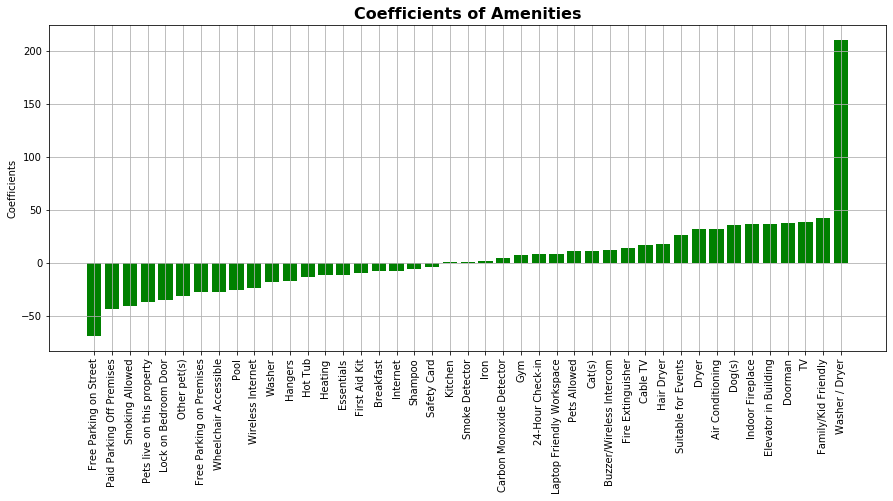

<Figure size 1080x432 with 0 Axes>

In [44]:
# Creating the amenities visualization

plt.rcParams['figure.figsize'] = (15,6)

fig, ax = plt.subplots()
fig = plt.figure(figsize=(15,6))

# ax = fig.add_subplot()
ax.set_facecolor(color= 'white')

ax.bar(coef_table['Amenities'],coef_table['Coefs'], color ='green')

ax.set_xticklabels(coef_table['Amenities'],Rotation=90),
ax.set_ylabel('Coefficients')
ax.set_title('Coefficients of Amenities',fontsize=16,fontweight='bold')
ax.grid()
plt.show()

### Summary

<b>Answer:</b> A washer/dryer connection increases the price of an Airbnb listing the most. 

<b>Other Notes:</b>
<br>
<br>A few other amenities that increase the price of an Airbnb listing are: 
Cable TV, pets, elevator in building, and a gym. 
<br>Some amenities that decrease the price of an Airbnb listing are:
Free parking on the street, smoking allowed, pool, and wireless internet
<br>
<br>
Note that the above visualization is only an interpretation of the effect amenities have on price while isolated. In general, amenities are grouped together.


## Question 3: What neighbourhood is the most expensive/least expensive?

In [45]:
# Creating a neighbourhood dataframe
neigh_df = listings.loc[:,['neighbourhood','price($)']]
neigh_df.head()

,neighbourhood,price($)
0,Roslindale,250.0
1,Roslindale,65.0
2,Roslindale,65.0
3,NaN,75.0
4,Roslindale,79.0


In [46]:
# Creating dummy variables for the neighbourhoods
neigh_df = pd.get_dummies(neigh_df,dummy_na=True, drop_first=True)

# removing price($) feature and adding it to the end of the dataframe
df1 = neigh_df.pop('price($)')
neigh_df['price($)'] = df1

neigh_df.head()

,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,price($)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,250.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,65.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,65.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,75.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,79.0


In [47]:
from sklearn.linear_model import LinearRegression

# Creating feature and target datasets
neigh_X = neigh_df.drop('price($)',axis=1)
neigh_y = neigh_df['price($)']

lr = LinearRegression()
model = lr.fit(neigh_X,neigh_y)

In [48]:
coef_table = pd.DataFrame(list(neigh_X.columns)).copy()

coef_table.rename(columns={0:'Neighbourhoods'}, inplace=True)
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())

coef_table = coef_table.sort_values(by="Coefs", ascending=True).reset_index(drop=True)

coef_table.head()

,Neighbourhoods,Coefs
0,neighbourhood_Chestnut Hill,-43.412088
1,neighbourhood_Mattapan,-42.162088
2,neighbourhood_Somerville,-21.085165
3,neighbourhood_Hyde Park,-20.482088
4,neighbourhood_Dorchester,-16.710806


### Data Modeling

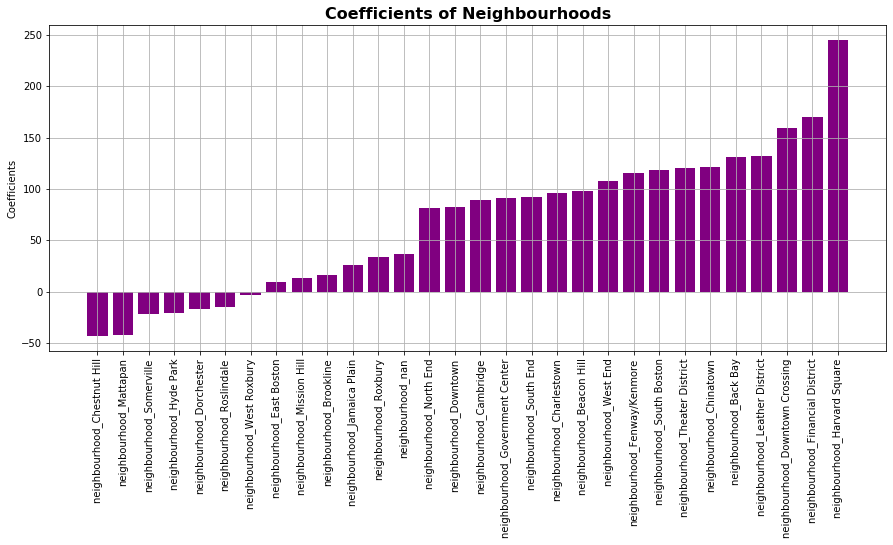

<Figure size 1080x432 with 0 Axes>

In [49]:
plt.rcParams['figure.figsize'] = (15,6)

fig, ax = plt.subplots()
fig = plt.figure(figsize=(15,6))

# ax = fig.add_subplot()
ax.set_facecolor(color= 'white')

ax.bar(coef_table['Neighbourhoods'],coef_table['Coefs'], color ='purple')

ax.set_xticklabels(coef_table['Neighbourhoods'],Rotation=90),
ax.set_ylabel('Coefficients')
ax.set_title('Coefficients of Neighbourhoods',fontsize=16,fontweight='bold')
ax.grid()
plt.show()

### Summary

<b>Answer:</b> Harvard Square has the most expensive listings. Chestnut Hill has the cheapest listings.

I still wanted to analyze a little further to see the percentage of records each neighbourhood accounted for.

In [50]:
for feature in list(neigh_df.columns):
    print(feature + " has {} percent values".format(neigh_df[feature].value_counts().values[1]/neigh_df.shape[0]*100))

neighbourhood_Back Bay has 8.117154811715482 percent values
neighbourhood_Beacon Hill has 4.853556485355648 percent values
neighbourhood_Brookline has 0.22315202231520223 percent values
neighbourhood_Cambridge has 0.19525801952580196 percent values
neighbourhood_Charlestown has 2.2036262203626222 percent values
neighbourhood_Chestnut Hill has 0.11157601115760112 percent values
neighbourhood_Chinatown has 2.1757322175732217 percent values
neighbourhood_Dorchester has 5.439330543933055 percent values
neighbourhood_Downtown has 0.22315202231520223 percent values
neighbourhood_Downtown Crossing has 0.7252440725244073 percent values
neighbourhood_East Boston has 3.2635983263598325 percent values
neighbourhood_Fenway/Kenmore has 6.94560669456067 percent values
neighbourhood_Financial District has 0.36262203626220363 percent values
neighbourhood_Government Center has 0.08368200836820083 percent values
neighbourhood_Harvard Square has 0.05578800557880056 percent values
neighbourhood_Hyde Park 

Note that Harvard square only made up .06% of the records so the median price may not accurately represent the neighbourhood. However, with limited data, it still had the highest median price. Also, Chestnut Hill, the neighbourhood with the lowest median price, only made up .11% of the records.

## Question 4: What feature(s) contribute the most to the median price?

We will first have to replace all NULL values before predicting the price 

In [51]:
# Creating a list of numerical features that have NULL values

numerical_with_nan = [feature for feature in listings.columns if listings[feature].isna().sum() > 1 and listings[feature].dtypes != 'O']

# Printing the percentage of NULL values from numerical features with NULL values

for feature in numerical_with_nan:
    print("{}: {}% missing values".format(feature, np.round(listings[feature].isna().mean(),4)))

host_response_rate(%): 0.1314% missing values
host_acceptance_rate(%): 0.1314% missing values
bathrooms: 0.0039% missing values
bedrooms: 0.0028% missing values
beds: 0.0025% missing values
cleaning_fee($): 0.3088% missing values
review_scores_rating: 0.2268% missing values
review_scores_accuracy: 0.2296% missing values
review_scores_cleanliness: 0.2282% missing values
review_scores_checkin: 0.2287% missing values
review_scores_communication: 0.2282% missing values
review_scores_location: 0.2293% missing values
review_scores_value: 0.229% missing values
reviews_per_month: 0.2109% missing values


To eliminate the effect of potential outliers, we will replace the NaN values with the feature's median value

In [52]:
for feature in numerical_with_nan:
    
    median_value = listings[feature].median()
    listings[feature+'_nan'] = np.where(listings[feature].isna(),1,0)
    
    # Replacing NULL values with median value of the feature
    listings[feature].fillna(median_value, inplace=True)

In [53]:
listings[numerical_with_nan].isna().sum()

host_response_rate(%)          0
host_acceptance_rate(%)        0
bathrooms                      0
bedrooms                       0
beds                           0
cleaning_fee($)                0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

### Categorical Features

Categorical values must be converted to numerical values

In [54]:
# Creating a list of categorical features that have NULL values

features_nan = [feature for feature in listings.columns if listings[feature].isna().sum() > 1 and listings[feature].dtypes == 'O']

# Printing the percentage of NULL values from categorical features with NULL values

for feature in features_nan:
    print("{}: {}% missing values".format(feature, np.round(listings[feature].isna().mean(),4)))

host_response_time: 0.1314% missing values
neighbourhood: 0.1515% missing values
city: 0.0006% missing values
zipcode: 0.0106% missing values
property_type: 0.0008% missing values


In [55]:
def replace_cat_feature(df,features_nan):
    """
    This function replaces categorical NULL values
    Input: A dataframe and a list of categorical features with NULL values.
    Output: A dataframe with NULL values replaced with the string 'Missing'
    
    """
    
    df = df.copy()
    df[features_nan] = df[features_nan].fillna('Missing')
    return df


listings = replace_cat_feature(listings,features_nan)

In [56]:
listings[features_nan].isna().sum()

host_response_time    0
neighbourhood         0
city                  0
zipcode               0
property_type         0
dtype: int64

### Transforming Categorical Features

In [57]:
for feature in listings.select_dtypes(include='object').columns:
    print(feature+" has {} distinct values".format(len(listings.select_dtypes(include='object')[feature].unique())))

host_response_time has 5 distinct values
host_is_superhost has 2 distinct values
host_has_profile_pic has 2 distinct values
host_identity_verified has 2 distinct values
neighbourhood has 31 distinct values
neighbourhood_cleansed has 25 distinct values
city has 39 distinct values
zipcode has 44 distinct values
smart_location has 39 distinct values
is_location_exact has 2 distinct values
property_type has 14 distinct values
room_type has 3 distinct values
bed_type has 5 distinct values
calendar_updated has 38 distinct values
instant_bookable has 2 distinct values
cancellation_policy has 4 distinct values
require_guest_profile_picture has 2 distinct values
require_guest_phone_verification has 2 distinct values


### One Hot Encoding

We will use one hot encoding to transform multiple features

In [58]:
def one_hot_top_x(df, feature, top_labels):
    
    """
    
    This function creates dummy variables given a dataframe, feature,
    and list with the labels intended
    
    """
    for label in top_labels:
        df[feature+'_'+label] = np.where(df[feature] == label, 1, 0) 

In [59]:
listings['host_id'] = listings.host_id.astype(str)

In [60]:
##### Neighbourhood

# A list of the top 10 neighbourhood based on frequency 
top_10_neigh = [x for x in listings.neighbourhood.value_counts().sort_values(ascending=False).head(10).index]

one_hot_top_x(listings,'neighbourhood',top_10_neigh)


##### Neighbourhood Cleansed

# A list of the top 10 neighbourhood_cleansed based on frequency
top_10_neigh_cl = [x for x in listings.neighbourhood_cleansed.value_counts().sort_values(ascending=False).head(10).index] 

one_hot_top_x(listings,'neighbourhood_cleansed',top_10_neigh_cl)


##### City

one_hot_top_x(listings,'city',['Boston'])


##### Zipcode

# Creating the Lists to Input into the One Hot Encoding Function
top_10_zip = [x for x in listings.zipcode.value_counts().sort_values(ascending=False).head(10).index]

# Top 10 zip codes will each be separated to different columns
one_hot_top_x(listings,'zipcode',top_10_zip)


##### Smart Location

one_hot_top_x(listings,'smart_location',['Boston, MA'])

##### Property Type

top_6_property = [x for x in listings.property_type.value_counts().sort_values(ascending=False).head(6).index]

# Top 6 property types will each be expanded to separate columns
one_hot_top_x(listings,'property_type',top_6_property)


##### Host_id

top_10_host_id = [x for x in listings.host_id.value_counts().sort_values(ascending=False).head(10).index]

# Top 10 host id's will each be expanded to separate columns
one_hot_top_x(listings,'host_id',top_10_host_id)

In [61]:
# Create dummy variables for boolean features

bool_cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']

for feature in bool_cols:
    listings[feature] = listings[feature].replace({'t':1,'f':0})

In [62]:
# Creating a map for 'calendar_updated' feature

response_time_map = {'within an hour':1,
                    'within a few hours':2,
                    'within a day':3,
                    'a few days or more':4
}

In [63]:
# Creating a map for 'host_response_time' feature

calendar_map = {'2 weeks ago': 14,
                 'a week ago': 7,
                 '5 days ago': 5,
                 '3 days ago': 3,
                  'yesterday': 1,
                      'today': 1,
                '6 weeks ago': 42,
               '3 months ago': 90,
                 '2 days ago': 2,
               '2 months ago': 60,
               '5 months ago': 150,
                '3 weeks ago': 21,
              '10 months ago': 300,
                '4 weeks ago': 28,
                 '1 week ago': 7,
                 '6 days ago': 6,
                 '4 days ago': 4,
              '12 months ago': 360,
               '6 months ago': 180,
               '8 months ago': 240,
               '4 months ago': 120,
                '5 weeks ago': 35,
              '15 months ago': 450,
                '7 weeks ago': 49,
               '7 months ago': 210,
               '9 months ago': 270,
              '16 months ago': 480,
              '11 months ago': 330,
              '14 months ago': 420,
              '13 months ago': 390,
              '22 months ago': 660,
                      'never': 0,
              '17 months ago': 510,
              '25 months ago': 750,
              '30 months ago': 900,
              '18 months ago': 540,
              '23 months ago': 690,
              '20 months ago': 600
}

In [64]:
# Converting the time intervals to an integer
listings['host_response_time'] = listings.host_response_time.map(response_time_map)

# Because host_response_time will now be a float type column, we will replace the NaN values 
listings['host_response_time'].fillna(median_value, inplace=True)

# Converting the 'calendar_updated' feature
listings['calendar_updated'] = listings.calendar_updated.map(calendar_map)

In [65]:
# Creating dummy variables for categories with 2-4 levels
dummy_cols = ['room_type', 'bed_type', 'cancellation_policy']

listings = pd.get_dummies(listings, columns=dummy_cols, drop_first=True)

In [66]:
# Dropping redundant columns
cat_cols_todrop = ['neighbourhood','neighbourhood_cleansed','city','zipcode','smart_location','property_type','latitude','longitude']

listings.drop(cat_cols_todrop, axis=1, inplace=True)

### Splitting into Training and Test Set

In [67]:
print("This dataset has {} rows and {} columns".format(listings.shape[0],listings.shape[1]),end="\n")
listings.head()

This dataset has 3585 rows and 151 columns


,host_id,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price($),cleaning_fee($),guests_included,extra_people($),minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Smoking Allowed,Wireless Internet,Laptop Friendly Workspace,Essentials,Carbon Monoxide Detector,Wheelchair Accessible,Indoor Fireplace,TV,Fire Extinguisher,Free Parking on Premises,24-Hour Check-in,Hot Tub,Pool,Paid Parking Off Premises,Washer / Dryer,Air Conditioning,Washer,Hair Dryer,Suitable for Events,Shampoo,Pets Allowed,Other pet(s),Elevator in Building,Breakfast,Family/Kid Friendly,Doorman,Internet,Dog(s),Cable TV,Safety Card,Gym,Kitchen,Dryer,First Aid Kit,Heating,Pets live on this property,Iron,Free Parking on Street,Hangers,Buzzer/Wireless Intercom,Lock on Bedroom Door,Cat(s),Smoke Detector,host_response_rate(%)_nan,host_acceptance_rate(%)_nan,bathrooms_nan,bedrooms_nan,beds_nan,cleaning_fee($)_nan,review_scores_rating_nan,review_scores_accuracy_nan,review_scores_cleanliness_nan,review_scores_checkin_nan,review_scores_communication_nan,review_scores_location_nan,review_scores_value_nan,reviews_per_month_nan,neighbourhood_Missing,neighbourhood_Allston-Brighton,neighbourhood_Jamaica Plain,neighbourhood_South End,neighbourhood_Back Bay,neighbourhood_Fenway/Kenmore,neighbourhood_South Boston,neighbourhood_Dorchester,neighbourhood_Beacon Hill,neighbourhood_North End,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_South End,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_Downtown,city_Boston,zipcode_02116,zipcode_02130,zipcode_02118,zipcode_02215,zipcode_02134,zipcode_02114,zipcode_02127,zipcode_02135,zipcode_02115,zipcode_02128,"smart_location_Boston, MA",property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Bed & Breakfast,property_type_Loft,host_id_30283594,host_id_25188,host_id_9419684,host_id_12243051,host_id_22348222,host_id_4962900,host_id_1444340,host_id_26956083,host_id_21184200,host_id_16186589,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,31303940,1.17,1.0,0.94,0,1,1,0,1,4,1.5,2.0,3.0,250.0,35.0,1,0.0,2,1125,14,0,0,0,0,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0,0,1,1.17,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,2572247,1.00,1.0,1.00,0,1,1,1,1,2,1.0,1.0,1.0,65.0,10.0,0,0.0,2,15,7,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,0,0,1,1.30,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,16701,2.00,1.0,0.88,1,1,1,1,1,2,1.0,1.0,1.0,65.0,50.0,1,20.0,3,45,5,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0,1,0,1,0.47,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
3,6031442,2.

In [68]:
# Splitting into train and test datasets

listings_X = listings.drop('price($)',axis=1)

listings_y = listings['price($)']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(listings_X, listings_y, test_size =0.2, random_state = 10)

In [69]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((2868, 150), (717, 150), (2868,), (717,))

### Feature Selection

In [70]:
X_train.head()

,host_id,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,cleaning_fee($),guests_included,extra_people($),minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Smoking Allowed,Wireless Internet,Laptop Friendly Workspace,Essentials,Carbon Monoxide Detector,Wheelchair Accessible,Indoor Fireplace,TV,Fire Extinguisher,Free Parking on Premises,24-Hour Check-in,Hot Tub,Pool,Paid Parking Off Premises,Washer / Dryer,Air Conditioning,Washer,Hair Dryer,Suitable for Events,Shampoo,Pets Allowed,Other pet(s),Elevator in Building,Breakfast,Family/Kid Friendly,Doorman,Internet,Dog(s),Cable TV,Safety Card,Gym,Kitchen,Dryer,First Aid Kit,Heating,Pets live on this property,Iron,Free Parking on Street,Hangers,Buzzer/Wireless Intercom,Lock on Bedroom Door,Cat(s),Smoke Detector,host_response_rate(%)_nan,host_acceptance_rate(%)_nan,bathrooms_nan,bedrooms_nan,beds_nan,cleaning_fee($)_nan,review_scores_rating_nan,review_scores_accuracy_nan,review_scores_cleanliness_nan,review_scores_checkin_nan,review_scores_communication_nan,review_scores_location_nan,review_scores_value_nan,reviews_per_month_nan,neighbourhood_Missing,neighbourhood_Allston-Brighton,neighbourhood_Jamaica Plain,neighbourhood_South End,neighbourhood_Back Bay,neighbourhood_Fenway/Kenmore,neighbourhood_South Boston,neighbourhood_Dorchester,neighbourhood_Beacon Hill,neighbourhood_North End,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_South End,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_Downtown,city_Boston,zipcode_02116,zipcode_02130,zipcode_02118,zipcode_02215,zipcode_02134,zipcode_02114,zipcode_02127,zipcode_02135,zipcode_02115,zipcode_02128,"smart_location_Boston, MA",property_type_Apartment,property_type_House,property_type_Condominium,property_type_Townhouse,property_type_Bed & Breakfast,property_type_Loft,host_id_30283594,host_id_25188,host_id_9419684,host_id_12243051,host_id_22348222,host_id_4962900,host_id_1444340,host_id_26956083,host_id_21184200,host_id_16186589,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
2076,43959997,1.00,1.00,0.99,0,4,1,1,1,6,1.0,2.0,3.0,100.0,4,45.0,2,1125,21,5,11,29,119,10,90.0,9.0,9.0,9.0,9.0,10.0,9.0,0,0,0,4,4.92,0,1,1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2364,30283594,2.00,0.98,0.55,0,749,1,1,1,5,2.0,2.0,2.0,100.0,1,0.0,3,1125,7,30,60,90,176,1,40.0,4.0,6.0,8.0,4.0,8.0,2.0,0,0,0,136,0.25,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3208,6814241,1.17,1.00,0.94,0,1,1,1,1,2,1.0,1.0,2.0,10.0,1,0.0,1,30,1,0,8,21,296,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0,0,1,1.17,0,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2181,22348222,2.00,

In [71]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [72]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.060, random_state=10))
feature_sel_model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20411480.7549072, tolerance: 6743.026319769876
  positive)


SelectFromModel(estimator=Lasso(alpha=0.06, random_state=10))

In [73]:
feature_sel_model.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,

In [74]:
# Make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# Print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_== 0)))

total features: 150
selected features: 130
features with coefficients shrank to zero: 17


In [75]:
selected_feat

Index(['host_response_time', 'host_response_rate(%)',
       'host_acceptance_rate(%)', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'accommodates', 'bathrooms',
       ...
       'host_id_1444340', 'host_id_26956083', 'host_id_21184200',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Couch',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_strict', 'cancellation_policy_super_strict_30'],
      dtype='object', length=130)

In [76]:
X_train = X_train[selected_feat]

In [77]:
X_train.shape

(2868, 130)

In [78]:
X_test = X_test[selected_feat]

In [79]:
X_test.head()

,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,cleaning_fee($),guests_included,extra_people($),minimum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Smoking Allowed,Wireless Internet,Laptop Friendly Workspace,Essentials,Carbon Monoxide Detector,Wheelchair Accessible,Indoor Fireplace,TV,Fire Extinguisher,Free Parking on Premises,24-Hour Check-in,Hot Tub,Pool,Paid Parking Off Premises,Washer / Dryer,Air Conditioning,Washer,Hair Dryer,Suitable for Events,Shampoo,Other pet(s),Elevator in Building,Breakfast,Family/Kid Friendly,Doorman,Internet,Dog(s),Cable TV,Safety Card,Gym,Kitchen,Dryer,First Aid Kit,Heating,Pets live on this property,Iron,Free Parking on Street,Hangers,Buzzer/Wireless Intercom,Lock on Bedroom Door,Cat(s),Smoke Detector,host_response_rate(%)_nan,bedrooms_nan,beds_nan,cleaning_fee($)_nan,review_scores_value_nan,reviews_per_month_nan,neighbourhood_Missing,neighbourhood_Allston-Brighton,neighbourhood_South End,neighbourhood_Back Bay,neighbourhood_Fenway/Kenmore,neighbourhood_South Boston,neighbourhood_Dorchester,neighbourhood_Beacon Hill,neighbourhood_North End,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_Downtown,city_Boston,zipcode_02116,zipcode_02130,zipcode_02118,zipcode_02215,zipcode_02134,zipcode_02127,zipcode_02115,zipcode_02128,"smart_location_Boston, MA",property_type_Apartment,property_type_House,property_type_Townhouse,property_type_Bed & Breakfast,property_type_Loft,host_id_25188,host_id_9419684,host_id_12243051,host_id_22348222,host_id_4962900,host_id_1444340,host_id_26956083,host_id_21184200,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_strict,cancellation_policy_super_strict_30
236,1.00,1.0,1.00,0,3,1,1,1,6,2.0,2.0,3.0,20.0,4,15.0,1,2,0,23,42,121,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,0,0,0,3,1.17,0,1,1,1,1,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2855,1.00,0.9,1.00,0,1,0,0,1,3,1.0,1.0,2.0,50.0,1,0.0,7,3,14,44,74,74,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0,1,1.30,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3460,1.00,1.0,1.00,0,1,1,0,1,2,0.5,1.0,1.0,50.0,1,0.0,5,60,0,0,0,0,2,94.0,10.0,10.0,10.0,10.0,10.0,9.0,1,0,0,1,0.98,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
784,2.00,1.0,1.00,0,3,1,1,1,1,1.5,1.0,1.0,100.0,1,20.0,30,28,18,48,78,105,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1,0.14,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
454,1.17,1.0,0.94,0,1,1,0,1,4,1.0,2.0,2.0,50.0,1,0.0,2,180,0,0,0,0,3,93.0,9.0,10.0,10.0,10.0,9.0,10.0,0,0,0,1,0.29,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,

In [80]:
X_test.shape

(717, 130)

### Train Model

In [81]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train,y_train)
model

LinearRegression()

In [82]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table

,0
0,host_response_time
1,host_response_rate(%)
2,host_acceptance_rate(%)
3,host_is_superhost
4,host_listings_count
5,host_has_profile_pic
6,host_identity_verified
7,is_location_exact
8,accommodates
9,bathrooms


In [83]:
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())

In [84]:
coef_table

,0,Coefs
0,host_response_time,-8.460156
1,host_response_rate(%),-12.474231
2,host_acceptance_rate(%),14.598765
3,host_is_superhost,20.214301
4,host_listings_count,-0.135912
5,host_has_profile_pic,40.007053
6,host_identity_verified,-10.857129
7,is_location_exact,-25.565021
8,accommodates,8.000518
9,bathrooms,29.233806


In [85]:
#coef_table = pd.DataFrame(list(neigh_X.columns)).copy()

coef_table.rename(columns={0:'Features'}, inplace=True)
#coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())

coef_table = coef_table.sort_values(by="Coefs", ascending=True).reset_index(drop=True)

coef_table.head()

,Features,Coefs
0,host_id_25188,-355.465401
1,host_id_4962900,-172.965671
2,room_type_Shared room,-73.824574
3,beds_nan,-71.634655
4,room_type_Private room,-60.152158


### Data Modeling

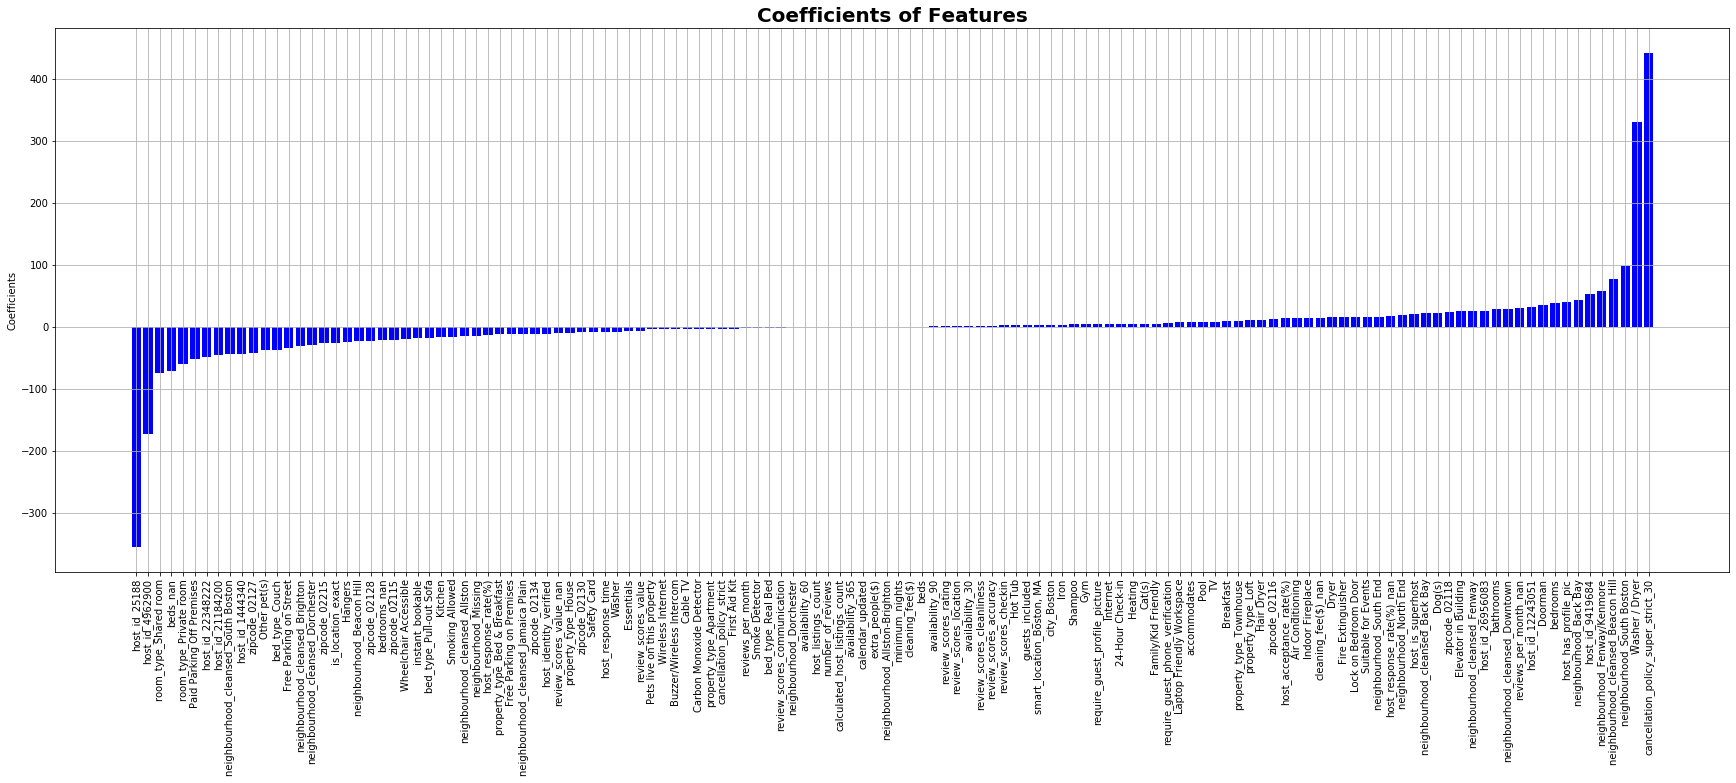

<Figure size 2160x720 with 0 Axes>

In [86]:
plt.rcParams['figure.figsize'] = (30,10)

fig, ax = plt.subplots()
fig = plt.figure(figsize=(30,10))

# ax = fig.add_subplot()
ax.set_facecolor(color= 'white')

ax.bar(coef_table['Features'],coef_table['Coefs'], color ='blue')

ax.set_xticklabels(coef_table['Features'],Rotation=90),
ax.set_ylabel('Coefficients')
ax.set_title('Coefficients of Features',fontsize=20,fontweight='bold')
ax.grid()
plt.show()

### Summary

Judging from the graph, the feature with the most adverse effect on price is 'cancellation_polict_super_strict'. It appears that hosts with a super strict cancellation policy tend to charge more. The next features are washer/dryer, and neighbourhood of South Boston. Note that when isolating only neighbourhoods, we did not see South Boston as the most expensive neighbourhood. All things considered, South Boston seems a better predictor when neighbourhood is not the only isolated feature.

In [87]:
Y_pred = lr.predict(X_test)

In [88]:
from sklearn.metrics import r2_score, max_error, mean_squared_error

print("The model can accurately predict {} percent of the AirBnB prices".format(r2_score(y_test, Y_pred)*100))

The model can accurately predict 51.31897433418887 percent of the AirBnB prices


51.3% is not a great r2 score, but Airbnb listing prices can be quite unpredictable.

In [89]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, Y_pred)


7745.233602994321

The mean squared error is quite high which shows that there is a lot of variation from the mean. Perhaps in another analysis I would choose to drop outliers in order to get a more accurate result. 